#**Data Analyst Assestment Lilia Solís**

In [1]:
# Montado de drive (google colab)
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Paquetes de python
import pandas as pd
import numpy as np
import requests
import missingno as msn
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [3]:
# Hacemos request a la API para obtener la información.
response = requests.get('https://analytics.deacero.com/api/teenus/get-data/c744a2a4-ab89-5432-b5e6-9f320162e160')
json_data = response.json()

In [4]:
np.shape(json_data)

(119390,)

In [5]:
# Cargamos la información en un DataFrame
df = pd.DataFrame(json_data)


In [6]:
# Vemos toddas las columnas del df
df.head(2)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,City Hotel,1,615,2017,March,11,16,0,2,2,...,Non Refund,1,NULL,0,Transient,62,0,0,Canceled,21/10/2015
1,City Hotel,1,615,2017,March,11,16,0,2,2,...,Non Refund,1,NULL,0,Transient,62,0,0,Canceled,21/10/2015


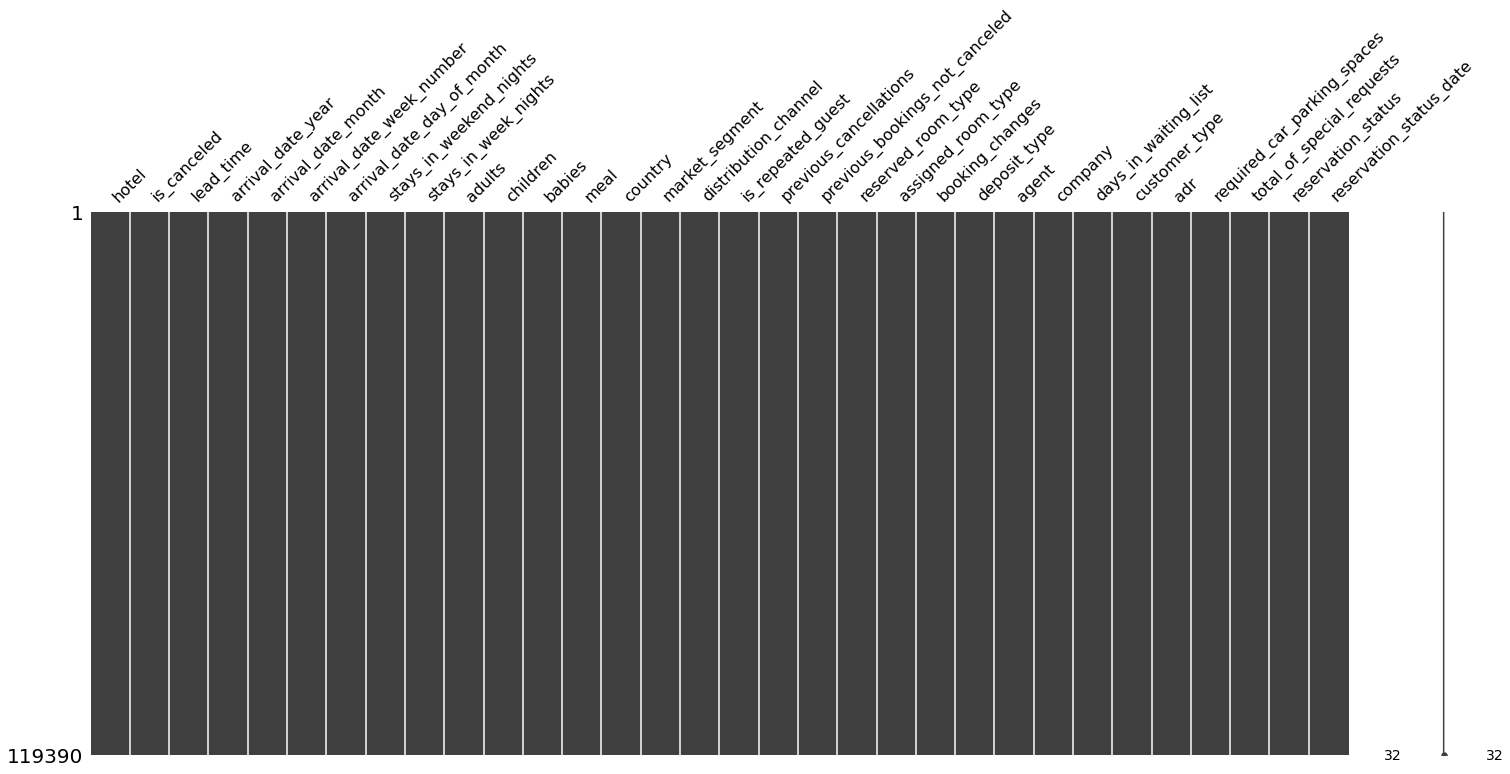

In [7]:
# Matriz para ver datos completos o faltantes
msn.matrix(df)

In [8]:
# Revisión de nulos en todas las columnas
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                         

**¿De dónde vienen los huéspedes?**

In [9]:
# Columna country
df.country


0         PRT
1         PRT
2         PRT
3         PRT
4         PRT
         ... 
119385    FRA
119386    FRA
119387    PRT
119388    FRA
119389    CHE
Name: country, Length: 119390, dtype: object

In [10]:
# Saco el valor único de la columna Country para ver la lista de países de procedencia
print(df['country'].unique())
print(type(df['country'].unique()))

['PRT' 'NLD' 'FRA' 'IRL' 'GRC' 'ESP' 'GBR' 'TUR' 'DEU' 'BRA' 'DNK' 'LUX'
 'ITA' 'USA' 'CN' 'CHE' 'BEL' 'CHN' 'NOR' 'ROU' 'AUT' 'SAU' 'POL' 'ISR'
 'FIN' 'RUS' 'HUN' 'TUN' 'ARG' 'SVN' 'AGO' 'BEN' 'MAC' 'ARE' 'SWE' 'CHL'
 'MOZ' 'CPV' 'MAR' 'AUS' 'CZE' 'EST' 'JPN' 'KOR' 'MNE' 'PHL' 'MEX' 'NGA'
 'ZAF' 'KWT' 'COL' 'UKR' 'LVA' 'PER' 'THA' 'HRV' 'NZL' 'BHR' 'IDN' 'UMI'
 'IND' 'NULL' 'OMN' 'BWA' 'DZA' 'EGY' 'MLT' 'JEY' 'ECU' 'CYP' 'SVK' 'BGR'
 'ALB' 'SEN' 'SMR' 'PRI' 'SRB' 'LTU' 'HKG' 'BLR' 'IRN' 'BGD' 'DOM' 'MDV'
 'CYM' 'ZMB' 'ZWE' 'URY' 'MYT' 'JOR' 'TWN' 'QAT' 'MYS' 'CRI' 'KAZ' 'GNB'
 'GHA' 'FRO' 'GAB' 'CIV' 'AND' 'AZE' 'GIB' 'LIE' 'TZA' 'JAM' 'VNM' 'GEO'
 'CAF' 'IMN' 'GGY' 'LBN' 'CMR' 'VEN' 'MMR' 'IRQ' 'FJI' 'PAK' 'ISL' 'PAN'
 'SYC' 'SGP' 'TMP' 'MUS' 'BFA' 'ARM' 'KEN' 'LKA' 'MCO' 'LBY' 'MKD' 'MLI'
 'CUB' 'BIH' 'COM' 'SUR' 'NAM' 'BOL' 'UGA' 'UZB' 'SYR' 'BDI' 'PRY' 'BRB'
 'ABW' 'AIA' 'PLW' 'SLV' 'DMA' 'GLP' 'MWI' 'PYF' 'MDG' 'GUY' 'LCA' 'ATA'
 'RWA' 'NPL' 'BHS' 'ETH' 'TGO' 'GTM' 'DJI' 'ASM' 'S

Lo que hice fue generar las líneas de código para identificar los datos úicos de la columna "country" de mi DataFrame. De esa forma podemos observar en las líneas anteriores el resultado de las iniciales de los países de procedencia de los huéspedes de los hoteles objeto de estudio.

**¿Cuánto pagan los huéspedes por una habitación por noche en promedio?**

In [11]:

# Busco precio máximmo pagado por noche
df.adr.max()



'99.96'

In [12]:
# Columna adr 
df.adr

0             62
1             62
2             62
3             62
4             62
           ...  
119385    131.75
119386    101.15
119387     137.7
119388       197
119389     86.75
Name: adr, Length: 119390, dtype: object

In [13]:
# Año de los últimos registros del df
df.arrival_date_year.max()


2017

In [14]:
# Año de los primeros registros del df
df.arrival_date_year.min()

2015

In [15]:
# Analizamos qué tipo de dato tenemos por columna
df.dtypes

hotel                             object
is_canceled                       object
lead_time                         object
arrival_date_year                  int64
arrival_date_month                object
arrival_date_week_number           int64
arrival_date_day_of_month         object
stays_in_weekend_nights           object
stays_in_week_nights              object
adults                            object
children                          object
babies                            object
meal                              object
country                           object
market_segment                    object
distribution_channel              object
is_repeated_guest                 object
previous_cancellations            object
previous_bookings_not_canceled    object
reserved_room_type                object
assigned_room_type                object
booking_changes                   object
deposit_type                      object
agent                             object
company         

In [16]:
# La columna adr es un objeto y lo necesitamos convertir a floante ya que los precios tienen decimales
# Se muestra la media de la columna adr tipo flotante
df['adr'] = df['adr'].astype(float)
np.mean(df["adr"].to_numpy())



101.83112153446687

El precio promedio por noche que identifico en la columna adr del df es USD101.83

**¿Cómo varía el precio por noche durante el año?**




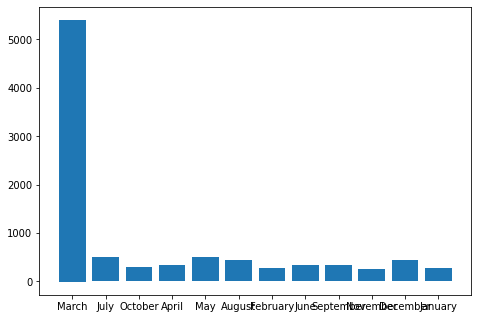

In [17]:
# Creo una gráfica de barras donde se muestran los meses del año y el precio promedio por noche por mes
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
months = df['arrival_date_month']
meanpernigh = df["adr"]
ax.bar(months,meanpernigh)
plt.show()
#Falta ordenar los meses del año conforme el año natural


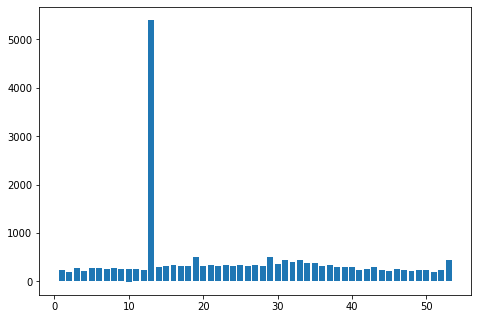

In [18]:
# Gráfico de barras por semana del año
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
months = df['arrival_date_week_number']
meanpernigh = df["adr"]
ax.bar(months,meanpernigh)
plt.show()
# Identifico un outlier

In [19]:
# Posición del Outlier
print(np.where(df['adr']>1000))

(array([102846]),)


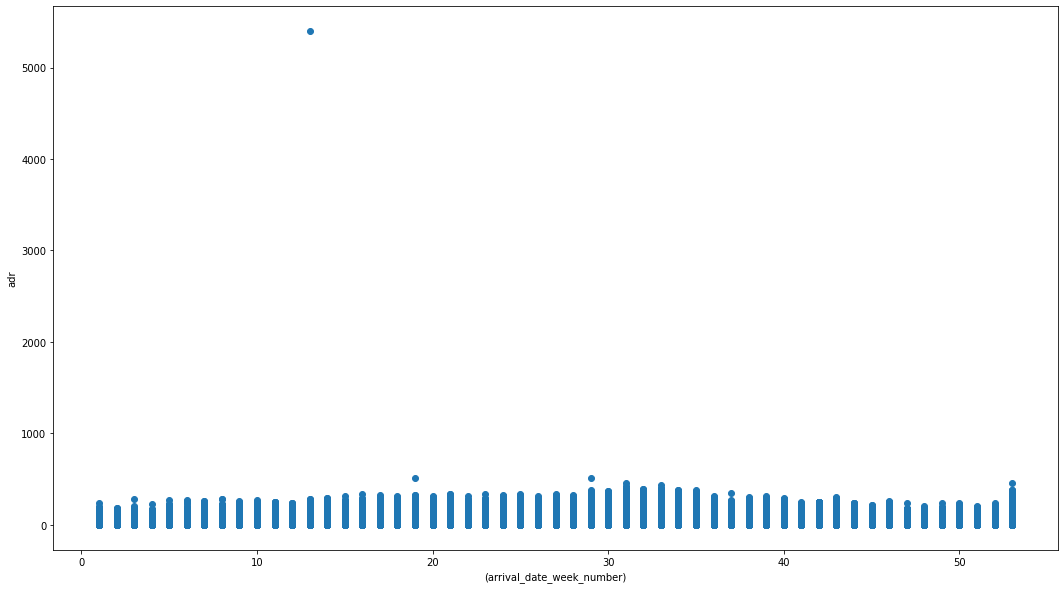

In [20]:
# Gráfica de dispersión
fig, ax = plt.subplots(figsize = (18,10))
ax.scatter(df['arrival_date_week_number'], df['adr'])
 
# x-axis label
ax.set_xlabel('(arrival_date_week_number)')
 
# y-axis label
ax.set_ylabel("adr")
plt.show()

A simple vista la única variación fuerte es en Marzo aunque, es un outlier. Se ve un pico muy alto desde el promedio (alrededor de 100 USD la noche a 5,400 USD la noche que es el valor máximo en la columna adr.
El outlier está en la posición número 102846 del df.
En la gráfica de dispersión se ve claramente el outlier que seguramente fue un error humano al momento del registro.





```
# Tiene formato de código
```

**¿Cuáles son los meses más ocupados?**

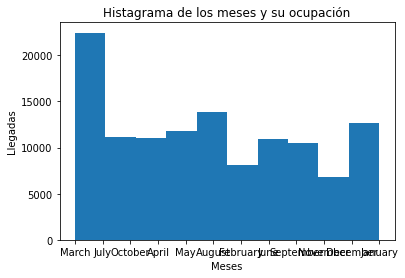

In [21]:
# Histagrama con el mes de llegada para identificar la cantidad de llegadas por mes
plt.hist(df["arrival_date_month"])
plt.title('Histagrama de los meses y su ocupación')
plt.xlabel('Meses')
plt.ylabel('Llegadas')
plt.show() 

El mes más ocupado de todos es Marzo, seguido de Agosto y Enero. En el histograma en cuestión se puede ver la cantidad de llegaddas por mes.

**¿Cuánto tiempo se queda la gente en los hoteles (noches)?**

In [22]:
# La columna stay_in_weekend_nights y stay_in_week_nights los convertimos a enteros 
df['stays_in_weekend_nights'] = df['stays_in_weekend_nights'].astype(int)
df['stays_in_week_nights'] = df['stays_in_week_nights'].astype(int)

In [23]:
# Se crea una columna que suma la noches de estadía entre semana y fin de semana
df['stays_in_total_nights'] = df['stays_in_weekend_nights'] + df['stays_in_week_nights']

In [24]:
# Media de la columna creada que suma la estadía entre semana y fin de semana
np.mean(df["stays_in_total_nights"])

3.4279001591423066

La gente se queda en promedio 3 noches en los hoteles

**Reservas por segmento de mercado**

In [25]:
# Valor único de la columna market_segment
print(df['market_segment'].unique())
print(type(df['market_segment'].unique()))

['Groups' 'Online TA' 'Offline TA/TO' 'Direct' 'Corporate' 'Complementary'
 'Aviation' 'Undefined']
<class 'numpy.ndarray'>


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
No handles with labels found to put in legend.


Text(0.5, 0, 'Market Segment')

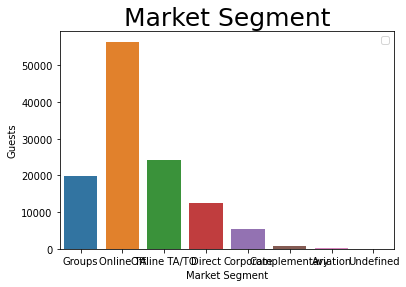

In [26]:
# Gráfica de barras especificando el segmento de mercado y cantidad de cada segmento
sns.countplot(df['market_segment'])
plt.title('Market Segment', fontsize = 25)
plt.legend(loc='upper right')
plt.ylabel('Guests')
plt.xlabel('Market Segment')

El segmento de mercado que cuenta con más visitas al hotel es el que compra Online por más del doble del semento que le sigue el cual es Offine TA/TO

**¿Cuántas reservas se cancelaron?**

In [27]:
# La columna is_canceled se convierte a int
df['is_canceled'] = df['is_canceled'].astype(int)


In [28]:
canceladas = (df['is_canceled']>=1)
print(canceladas)

0          True
1          True
2          True
3          True
4          True
          ...  
119385     True
119386     True
119387     True
119388     True
119389    False
Name: is_canceled, Length: 119390, dtype: bool


In [29]:
df.sum()

hotel                             City HotelCity HotelCity HotelCity HotelCity H...
is_canceled                                                                   44224
lead_time                         6156156156156156156156156156156152501762463121...
arrival_date_year                                                         240708931
arrival_date_month                MarchMarchMarchMarchMarchMarchMarchMarchMarchM...
arrival_date_week_number                                                    3243250
arrival_date_day_of_month         1616161616161616161616161616161616161616161616...
stays_in_weekend_nights                                                      110746
stays_in_week_nights                                                         298511
adults                            2222222222220232223332223222222223222222222212...
children                          0000000000000000000001000000000000010000000001...
babies                            000000000000000000000000000000000000000000

Hice una suma del df y así obtengo el número de cancelaciones, son 44224.

El 37% de los clientes cancelaron su reservación.

**¿Qué mes tiene el mayor número de cancelaciones?**

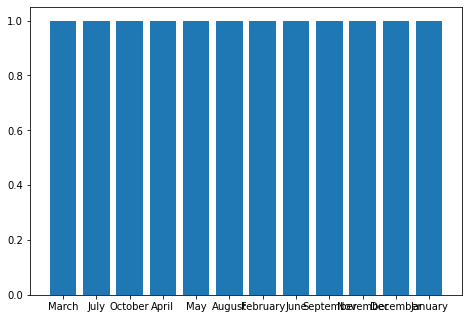

In [42]:
# Gráfica de puntos
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
months1 = df['arrival_date_month']
canceled = (df["is_canceled"]>=1)
ax.bar(months1,canceled)
plt.show()

**Tabla de correlación para las variables**

In [41]:
#Matriz de correlación de variables

print("The DataFrame of Hotels is:")
print(df, "\n")

corr_df = df.corr()
print("The correlation DataFrame is:")
print(corr_df, "\n")

The DataFrame of Hotels is:
             hotel  is_canceled lead_time  arrival_date_year  \
0       City Hotel            1       615               2017   
1       City Hotel            1       615               2017   
2       City Hotel            1       615               2017   
3       City Hotel            1       615               2017   
4       City Hotel            1       615               2017   
...            ...          ...       ...                ...   
119385  City Hotel            1       150               2016   
119386  City Hotel            1       150               2016   
119387  City Hotel            1        60               2016   
119388  City Hotel            1         9               2016   
119389  City Hotel            0       194               2016   

       arrival_date_month  arrival_date_week_number arrival_date_day_of_month  \
0                   March                        11                        16   
1                   March                

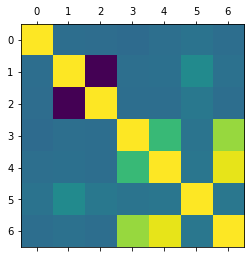

In [43]:
# Visualización de correlación

corr_df = df.corr(method='pearson')

plt.matshow(corr_df)
plt.show()

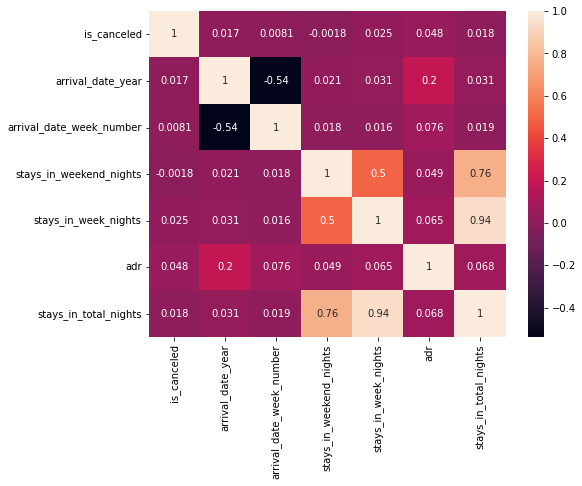

In [44]:
# Visualización de correlación
corr_df = df.corr(method='pearson')

plt.figure(figsize=(8, 6))
sns.heatmap(corr_df, annot=True)
plt.show()

Se identifica en esta matri de correlación que las variables más correlacionadas son arrival_date_year vs. arrival_date_week_number y también arrival_date_week_number vs. arriva_date_year